# Sample usage

This notebook gives you introduction to use the package.

In [1]:
import sys
sys.path.append("../")
sys.path.append(".")
from model_criticism_mmd import ModelTrainerTorchBackend, MMD
from model_criticism_mmd.backends import kernels_torch

WARNING (theano.configdefaults): install mkl with `conda install mkl-service`: No module named 'mkl'


In [2]:
%matplotlib inline

import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import pandas
import torch

# Device choice

If you are able to use CUDA, you can give `device_obj` to objects. The default value is CPU.

In [3]:
device_obj = torch.device('cpu')

# Scenario-1: 2 distributions are similar

In [4]:
x = np.random.normal(3, 0.5, size=(500, 2))
y = np.random.normal(3, 0.5, size=(500, 2))

In [5]:
df_x = pandas.DataFrame(x)
df_x['label'] = 'green'
df_y = pandas.DataFrame(y)
df_y['label'] = 'red'
df_data_scenario_1 = pandas.concat([df_x, df_y])
df_data_scenario_1.columns = ['dim0', 'dim1', 'label']

<AxesSubplot:xlabel='dim0', ylabel='dim1'>

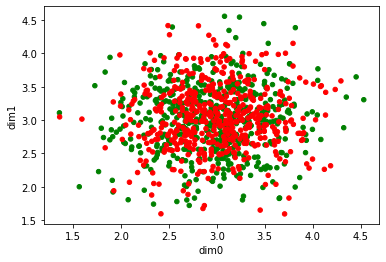

In [6]:
df_data_scenario_1.plot.scatter(x='dim0', y='dim1', c=df_data_scenario_1['label'])

In [7]:
n_train = 400
x_train = x[:n_train]
y_train = y[:n_train]
x_test = x[n_train:]
y_test = y[n_train:]

In [8]:
mmd_estimator = MMD(kernels_torch.BasicRBFKernelFunction(device_obj=device_obj, opt_sigma=True), device_obj=device_obj)
trainer = ModelTrainerTorchBackend(mmd_estimator=mmd_estimator, device_obj=device_obj)
trained_obj = trainer.train(x_train, y_train, num_epochs=1000, batchsize=200)

input data N(sample-size)=400, N(dimension)=2
Validation at 0. MMD^2 = 0.0003978707365268619, ratio = [3.97870737] obj = [-1.38095698]
     5: [avg train] MMD^2 0.001861481332215087 obj [-2.90695451] val-MMD^2 0.005311391926573705 val-ratio [53.11391927] val-obj [-3.97243903]  elapsed: 0.0
    25: [avg train] MMD^2 0.012850298465300666 obj [-3.73868343] val-MMD^2 0.024789719180887144 val-ratio [40.69200626] val-obj [-3.70603167]  elapsed: 0.0
    50: [avg train] MMD^2 0.013398113897679326 obj [-4.86511841] val-MMD^2 0.02500037276138305 val-ratio [250.00372761] val-obj [-5.52147583]  elapsed: 0.0
   100: [avg train] MMD^2 0.013353836054748262 obj [-4.86267663] val-MMD^2 0.025000000132160503 val-ratio [250.00000132] val-obj [-5.52146092]  elapsed: 0.0
   200: [avg train] MMD^2 0.013359471223081468 obj [-4.86239985] val-MMD^2 0.02500000000003051 val-ratio [250.] val-obj [-5.52146092]  elapsed: 0.0
   300: [avg train] MMD^2 0.013296861803475916 obj [-4.85838748] val-MMD^2 0.025000000000108

In [9]:
trained_params = trained_obj.kernel_function_obj.get_params()
print(f'Preffered parameters scales = {trained_obj.scales}, {trained_params}')

Preffered parameters scales = [3.223152  2.2018592], {'log_sigma': tensor([-5.7556], requires_grad=True)}


In [10]:
mmd2, ratio = trainer.mmd_distance(x_test, y_test)
print(f'MMD^2 distance = {mmd2}')

MMD^2 distance = 0.019997532361716072


# Scenario-2: 2 distributions are not similar

In [11]:
x = np.random.normal(3, 0.5, size=(500, 2))
y = np.random.normal(10, 5.5, size=(500, 2))

In [12]:
df_x = pandas.DataFrame(x)
df_x['label'] = 'green'
df_y = pandas.DataFrame(y)
df_y['label'] = 'red'
df_data_scenario_1 = pandas.concat([df_x, df_y])
df_data_scenario_1.columns = ['dim0', 'dim1', 'label']

<AxesSubplot:xlabel='dim0', ylabel='dim1'>

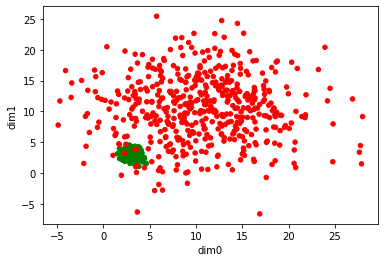

In [13]:
df_data_scenario_1.plot.scatter(x='dim0', y='dim1', c=df_data_scenario_1['label'])

In [14]:
n_train = 400
x_train = x[:n_train]
y_train = y[:n_train]
x_test = x[n_train:]
y_test = y[n_train:]

In [15]:
mmd_estimator = MMD(kernels_torch.BasicRBFKernelFunction(device_obj=device_obj, opt_sigma=True), device_obj=device_obj)
trainer = ModelTrainerTorchBackend(mmd_estimator, device_obj=device_obj)
trained_obj = trainer.train(x_train, y_train, num_epochs=1000, batchsize=200)

input data N(sample-size)=400, N(dimension)=2
Validation at 0. MMD^2 = 0.9383540351566297, ratio = [29.51034403] obj = [-3.38474085]
     5: [avg train] MMD^2 0.8283458636419327 obj [-3.73235301] val-MMD^2 0.8487431033233779 val-ratio [34.27187835] val-obj [-3.53432514]  elapsed: 0.0
    25: [avg train] MMD^2 0.8605139690337973 obj [-3.85928915] val-MMD^2 0.8777173469548164 val-ratio [32.99216437] val-obj [-3.49627009]  elapsed: 0.0
    50: [avg train] MMD^2 0.8556982341167145 obj [-3.76228867] val-MMD^2 0.8704430933308838 val-ratio [32.96346642] val-obj [-3.49539987]  elapsed: 0.0
   100: [avg train] MMD^2 0.8480513137693617 obj [-3.76559477] val-MMD^2 0.865274273736604 val-ratio [32.81113623] val-obj [-3.49076798]  elapsed: 0.0
   200: [avg train] MMD^2 0.8529602371509729 obj [-3.77005023] val-MMD^2 0.8649957709635375 val-ratio [32.96155923] val-obj [-3.49534201]  elapsed: 0.0
   300: [avg train] MMD^2 0.8526650692929436 obj [-3.77083058] val-MMD^2 0.8749469905436125 val-ratio [32.86

In [16]:
trained_params = trained_obj.kernel_function_obj.get_params()
print(f'Preffered parameters scales = {trained_obj.scales} / {trained_params}')
mmd2, ratio = trainer.mmd_distance(x_test, y_test)
print(f'MMD^2 distance = {mmd2}')

Preffered parameters scales = [0.64876693 0.7953209 ] / {'log_sigma': tensor([0.2014], requires_grad=True)}
MMD^2 distance = 0.870222993966666


# Kernel functions

You can set kernel functions as you like. The Kernel functions are in `model_criticism_mmd.backends.kernels_torch`


In [17]:
from model_criticism_mmd.backends import kernels_torch
kernel_matern = kernels_torch.MaternKernelFunction(device_obj=device_obj, nu=0.5)
mmd_estimator_matern = MMD(kernel_matern, device_obj=device_obj)
trainer_matern = ModelTrainerTorchBackend(mmd_estimator, device_obj=device_obj)
trained_obj_matern = trainer_matern.train(x_train, y_train, num_epochs=1000, batchsize=200)

input data N(sample-size)=400, N(dimension)=2
Validation at 0. MMD^2 = 1.022789730950022, ratio = [18.91870517] obj = [-2.94015112]
     5: [avg train] MMD^2 0.8285021129078568 obj [-3.7452918] val-MMD^2 0.8208240573224092 val-ratio [33.50686388] val-obj [-3.51175031]  elapsed: 0.0
    25: [avg train] MMD^2 0.8592838735147521 obj [-3.83753242] val-MMD^2 0.8767431633415811 val-ratio [32.79854197] val-obj [-3.49038406]  elapsed: 0.0
    50: [avg train] MMD^2 0.8579550155630321 obj [-3.79601075] val-MMD^2 0.8707540413230891 val-ratio [32.59280435] val-obj [-3.48409154]  elapsed: 0.0
   100: [avg train] MMD^2 0.8630141979867699 obj [-3.76551057] val-MMD^2 0.8818358091260564 val-ratio [32.68598627] val-obj [-3.48694643]  elapsed: 0.0
   200: [avg train] MMD^2 0.8595099000181763 obj [-3.83709002] val-MMD^2 0.874801497062631 val-ratio [32.75257691] val-obj [-3.48898164]  elapsed: 0.0
   300: [avg train] MMD^2 0.8517394684645285 obj [-3.76488592] val-MMD^2 0.8733943124267765 val-ratio [32.8454

In [19]:
trained_obj_matern.scales

array([0.6661851 , 0.80446994], dtype=float32)

As you see, the scales are totally different from the one with RBFKernel

# ARD weight

As you see in data generation, the data has huge variance only on __the 1st dimension__.

Then, the ARD weight has the highest value on the 1st dimension.

Remebmer that you set __opt_sigma = False__ when you need ARD weights.

In [20]:
import numpy
size = 100
n_epoch = 500
batch_size = 200

x_1st_dim = numpy.random.normal(loc=1.0, scale=0.0, size=size)
y_1st_dim = numpy.random.normal(loc=1.0, scale=50.0, size=size)

x_2_and_3_dim = numpy.random.normal(loc=10.0, scale=0.2, size=(size, 2))
y_2_and_3_dim = numpy.random.normal(loc=10.0, scale=0.2, size=(size, 2))

x = numpy.concatenate([numpy.reshape(x_1st_dim, (size, 1)), x_2_and_3_dim], axis=1)
y = numpy.concatenate([numpy.reshape(y_1st_dim, (size, 1)), y_2_and_3_dim], axis=1)

x_train = x[:80]
y_train = y[:80]
x_val = x[80:]
y_val = y[80:]

In [21]:
for n_dim in [0, 1, 2]:
    print(f'{n_dim+1} dim. mean(x)={x[:,n_dim].mean()} mean(y)={y[:,n_dim].mean()} var(x)={x[:,n_dim].var()} var(y)={y[:,n_dim].var()}')
# end for
dim_most_diff_varianace: int = sorted([(n_dim, abs(x[:,n_dim].var() - y[:,n_dim].var())) for n_dim in [0, 1, 2]],
                                      key=lambda t: t[1], reverse=True)[0][0]

1 dim. mean(x)=1.0 mean(y)=-1.7373424087017373 var(x)=0.0 var(y)=2989.2738943672807
2 dim. mean(x)=9.986034314564892 mean(y)=10.000488553518098 var(x)=0.04103754149166802 var(y)=0.04838390957911822
3 dim. mean(x)=9.982443795473742 mean(y)=10.006145784879141 var(x)=0.03137239973997109 var(y)=0.03479849352886397


In [22]:
mmd_estimator = MMD(kernels_torch.BasicRBFKernelFunction(device_obj=device_obj, opt_sigma=False), device_obj=device_obj)
trainer = ModelTrainerTorchBackend(mmd_estimator, device_obj=device_obj)
trained_obj = trainer.train(x_train, y_train, num_epochs=500, batchsize=200)

input data N(sample-size)=80, N(dimension)=3
Validation at 0. MMD^2 = 1.0582713221503885, ratio = [69.30702957] obj = [-4.23854634]
     5: [avg train] MMD^2 0.9786735672754121 obj [-3.60267082] val-MMD^2 1.0539064028613563 val-ratio [117.25079583] val-obj [-4.76431519]  elapsed: 0.0
    25: [avg train] MMD^2 1.008734581036691 obj [-6.50956286] val-MMD^2 1.0552032580480444 val-ratio [449.52341688] val-obj [-6.10818795]  elapsed: 0.0
    50: [avg train] MMD^2 1.0165835646883026 obj [-7.28916693] val-MMD^2 1.0617015650688828 val-ratio [3912.57215009] val-obj [-8.27195028]  elapsed: 0.0
   100: [avg train] MMD^2 1.017135522230156 obj [-7.39683458] val-MMD^2 1.0624936974757806 val-ratio [10624.93697476] val-obj [-9.27095906]  elapsed: 0.0
   200: [avg train] MMD^2 1.0168711977370664 obj [-7.49927358] val-MMD^2 1.0624948130181564 val-ratio [10624.94813018] val-obj [-9.27096011]  elapsed: 0.0
   300: [avg train] MMD^2 1.0166978094603936 obj [-7.56882948] val-MMD^2 1.0624964347160337 val-rati

In [23]:
assert np.argmax(trained_obj.scales) == dim_most_diff_varianace
trained_obj.scales

array([ 8.014457e+00, -6.231573e-04, -7.117367e-03], dtype=float32)

As you see, the index of max(scales) is same as the index that data has the highest variance.